<a href="https://colab.research.google.com/github/Hands-On-Fraud-Analytics/Chapter-11-Handling-Imbalanced-Data-Sets/blob/main/Chapter_11_Handling_Imbalanced_Data_Sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Example: Using SMOTE to balance a fraud dataset and visualizing synthetic fraudulent samples**

**Context:**
In the modern digital age, financial transactions occur at an unprecedented rate. With this increase in transaction volume, the risk of fraudulent activities also rises. Detecting these fraudulent transactions is of paramount importance to maintain the integrity of any financial system.

**Objectives:**
Understand the distribution and relationship between transaction amounts and their associated ratios.
Identify patterns that might indicate fraudulent activities.
Develop a preliminary model to predict potential fraud based on the given features.

**Dataset:**
The dataset consists of 1,000 entries with three columns: amount, ratio, and fraud. The amount column represents the transaction amount, the ratio column represents some internal metric associated with the transaction, and the fraud column is a binary indicator (0 for legitimate, 1 for fraudulent).


# **Scenario Analysis:**

**Scenario 1: High Transaction Amounts with Negative Ratios**
It's observed that transactions with exceptionally high amounts and negative ratios tend to be fraudulent. This pattern might indicate money laundering or other illicit activities where large sums are moved in ways to avoid detection.

**Scenario 2: Low Transaction Amounts with High Positive Ratios**
Transactions with smaller amounts but high positive ratios might indicate micro-fraud activities. These are transactions that, on their own, might not raise alarms but cumulatively can result in significant losses.

**Scenario 3: Consistent Transaction Amounts with Varying Ratio**s
If there are consistent transaction amounts but varying ratios, it might indicate scripted or bot-driven activities. These can be attempts to test the system's vulnerability or to execute fraud on a mass scale.


# **Analysis Steps:**

1. Data Loading and Preprocessing: Load the "SMOTE.csv" dataset and select the necessary columns (amount, ratio, and fraud).

2. Data Categorization: Divide the dataset into two categories: fraud and non-fraud cases.

3. Nearest Neighbors Identification: Use the k-nearest neighbors algorithm to identify the closest fraudulent neighbors of a random fraud instance.

4. Synthetic Fraud Sample Creation: Interpolate between two fraud instances using the SMOTE algorithm to generate a synthetic fraud sample.

5. Dataset Resampling: Apply the SMOTE algorithm to the entire dataset to generate additional synthetic fraud cases and balance the class distribution.

6. Visualization: Construct plots to visualize the original dataset with the synthetic fraud case and the resampled dataset.

7. Observations and Confirmation: Examine the plots to confirm the efficacy of the nearest neighbor’s algorithm and the plausibility of the synthetic fraud cases.

8. Recommendations: Provide actionable insights and recommendations based on the observations.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the credit card fraud dataset
data_df = pd.read_csv('SMOTE.csv', on_bad_lines='skip')
y = data_df['fraud'].values
data_df = pd.DataFrame(data_df, columns=['amount', 'ratio', 'fraud'])

In [3]:
# Explore the first five rows in the DataFrame
data_df.head(3)

,amount,ratio,fraud
0,2192.767639,0.110470,0
1,3340.146585,-1.332262,1
2,6010.997946,1.416943,0


In [5]:
# Explore the last five rows in the DataFrame
data_df.tail()

,amount,ratio,fraud
995,6643.987230,1.360893,0
996,3177.103301,0.885916,0
997,4504.805116,0.753960,0
998,5808.538129,1.166723,0
999,5156.851525,0.247383,0


In [4]:
# Obtain dataset information
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   amount  1000 non-null   float64
 1   ratio   1000 non-null   float64
 2   fraud   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


<Axes: >

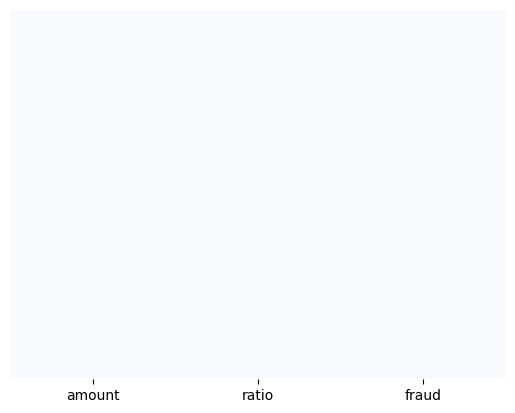

In [6]:
# now plot the heatmap with missing values represented as 'np.nan'
sns.heatmap(data_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

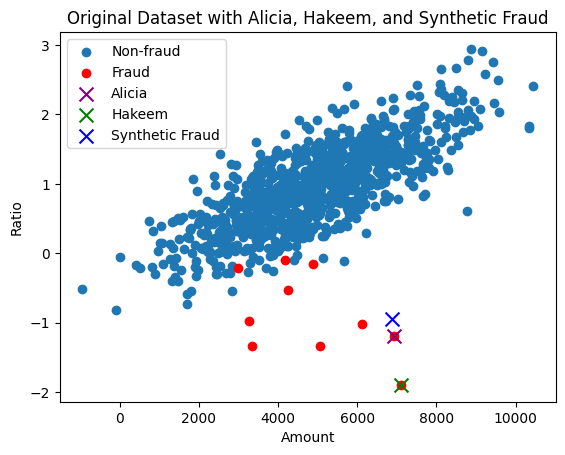

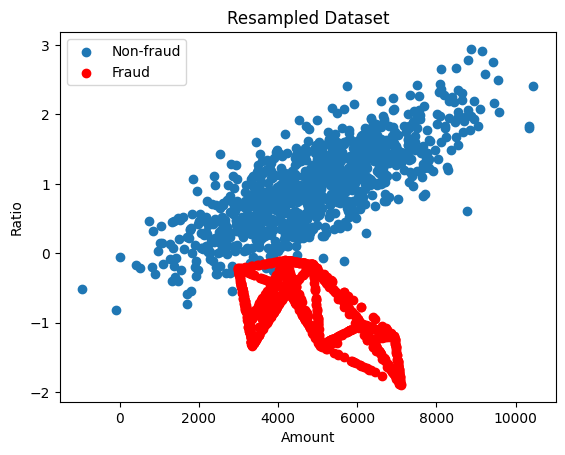

In [7]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
import random
import matplotlib.pyplot as plt


#****This step done above****
# Load the credit card fraud dataset
#data_df = pd.read_csv('SMOTE.csv', on_bad_lines='skip')
#y = data_df['fraud'].values
#data_df = pd.DataFrame(data_df, columns=['amount', 'ratio', 'fraud'])

# Separate the fraud and non-fraud cases
fraud_cases = data_df[data_df['fraud'] == 1]
non_fraud_cases = data_df[data_df['fraud'] == 0]

# Select a random fraud case (Alicia)
alicia = fraud_cases.sample(1, random_state=1)
k = 4

# Find the k nearest fraudulent neighbors of Alicia
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(fraud_cases.drop('fraud', axis=1))
distances, indices = nbrs.kneighbors(alicia.drop('fraud', axis=1))

# Randomly choose one of the neighbors (Hakeem)
hakeem = fraud_cases.iloc[random.choice(indices[0])]

# Create a synthetic fraudulent sample
random_number = random.uniform(0, 1)
difference = alicia[['amount', 'ratio']] - hakeem[['amount', 'ratio']]
synthetic_fraud = alicia[['amount', 'ratio']] + difference * random_number

# Apply SMOTE to the dataset
X = data_df[['amount', 'ratio']].values
sm = SMOTE(sampling_strategy=1.0, k_neighbors=k, random_state=1)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Visualize the original dataset, Alicia, neighbors, and synthetic fraud
fig, ax = plt.subplots()
ax.scatter(non_fraud_cases['amount'], non_fraud_cases['ratio'], label='Non-fraud')
ax.scatter(fraud_cases['amount'], fraud_cases['ratio'], label='Fraud', color='red')
ax.scatter(alicia['amount'], alicia['ratio'], label='Alicia', color='purple', marker='x', s=100)
ax.scatter(hakeem['amount'], hakeem['ratio'], label='Hakeem', color='green', marker='x', s=100)
ax.scatter(synthetic_fraud['amount'], synthetic_fraud['ratio'], label='Synthetic Fraud', color='blue', marker='x', s=100)
ax.legend()
plt.xlabel('Amount')
plt.ylabel('Ratio')
plt.title('Original Dataset with Alicia, Hakeem, and Synthetic Fraud')
plt.show()

# Visualize the resampled dataset
fig, ax = plt.subplots()
ax.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Non-fraud')
ax.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Fraud', color='red')
ax.legend()
plt.xlabel('Amount')
plt.ylabel('Ratio')
plt.title('Resampled Dataset')
plt.show()
